# Annotation prep for text classification 
Date: 10/17/2019 <br>
Author: Shawn Jung <br> 
Description: This notebook creates a text file for annotation tagging with Doccano. Doccano help tag and classify text data for NLP and machine learning. For more information and file format, visit https://github.com/chakki-works/doccano <br>
Dataset: I used a kaggle dataset, 'women's eCommerce clothing review' https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews 

Load libraries and the raw review file

In [1]:
import pandas as pd


In [2]:
review_raw =  pd.read_csv('./data/womens-ecommerce-clothing-reviews.csv', encoding='utf8', keep_default_na=False, index_col=0)
review_raw.head()


,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
annotated_prep = review_raw[['Class Name', 'Rating']]
annotated_prep['text'] = review_raw['Title'] + ' ' + review_raw['Review Text']
'''delete where text payload is empty since we work on text-mining'''
annotated_prep = annotated_prep[annotated_prep['text'] != ''] 


C:\Users\shawnagie\Anaconda3\envs\review-mining\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Let's assume we have limited resource for tagging, and the color mismatch between products and photos is rare occastion. Then, it would not make sense to sample by Rating category ratio, as most of reviews are positive with the score 5. So we'd better to take the balanced sample size per each rating group and product categories.

In [4]:
annotated_prep.groupby('Rating').count()

,Class Name,text
Rating,,
1,842,842
2,1565,1565
3,2871,2871
4,5077,5077
5,13131,13131


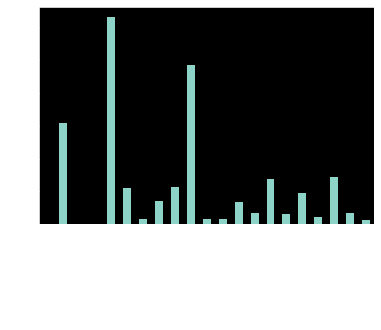

In [5]:
import matplotlib.pyplot as plt 
%matplotlib inline 
annotated_prep.groupby('Class Name')['Rating'].count().plot(kind='bar')
plt.show()

In [6]:
annotated_sample = annotated_prep.groupby(['Rating', 'Class Name'], group_keys=False).apply(lambda x: x.sample(n=min(len(x),10)))

annotated_sample.groupby(['Rating', 'Class Name']).count()


text
Rating Class Name      
1      Blouses       10
       Dresses       10
       Fine gauge    10
       Intimates      7
       Jackets       10
...                 ...
5      Skirts        10
       Sleep         10
       Sweaters      10
       Swim          10
       Trend         10

[94 rows x 1 columns]

In [7]:
annotated_sample['text'].count()


893

In [8]:
annotated_sample['text'].to_csv('./data/review_annotation_prep.csv', encoding='utf8', header=True, index_label='id')


